In [1]:
import torch
import numpy as np
from main import *
from torch.utils.data import DataLoader
from models.transformers import TransformerRegressor

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data = np.load('data/YZ_Cost_Scaled.npz')['data']
model = NN2(2048, 1, 8, 8, nn.ReLU)
print('Loaded Model and Data')
learning_rate = 1e-3
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

training_loss, testing_loss = cross_validate(5, model, optimizer, criterion, num_epochs, data, device)

Loaded Model and Data
0-Fold
Epoch 1 - Train Loss: 0.0108, Test Loss: 1865.5176


KeyboardInterrupt: 

## Transformer Base Test

In [2]:
train_data_path = 'YZ_Large_testing.npz'
test_data_path = 'YZ_Large_training.npz'

torch.manual_seed(0)
train_loader = DataLoader(AntDataset2D(train_data_path), batch_size = 8, shuffle= True)
test_loader = DataLoader(AntDataset2D(test_data_path), batch_size = 8, shuffle = True)

print('Finish DataLoaders')

# Hyperparameters
d_model = 2
nhead = 2
num_encoder_layers = 3
num_decoder_layers = 3
dim_feedforward = 256
dropout = 0.1
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TransformerRegressor(d_model, nhead,
                             num_encoder_layers,
                             num_decoder_layers,
                             dim_feedforward,
                             dropout).to(device)
print('Loaded Model')
learning_rate = 1e-3
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epochs, device)

Finish DataLoaders
Loaded Model


TypeError: forward() missing 1 required positional argument: 'tgt'

## 1-layer NN

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_data_path = 'YZ_Large_training.npz'
test_data_path = 'YZ_Large_testing.npz'
train_loader = DataLoader(AntDataset(train_data_path), batch_size=32, shuffle=True)
test_loader = DataLoader(AntDataset(test_data_path), batch_size=32, shuffle=True)

print('Loaded Data')

# Hyperparameters
model = SimpleNN(2048, 1, 8, nn.ReLU)
model.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

/home/david/anaconda3/envs/torch/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Loaded Data
Average Cost: 0.029260745272040367
Random Guess: 0.0003676150380014723
Epoch 1 - Train Loss: 0.0381, Test Loss: 0.0189
Average Cost: 0.02934732846915722
Random Guess: 0.0004268583046222516
Epoch 2 - Train Loss: 0.0145, Test Loss: 0.0138
Average Cost: 0.029246384277939796
Random Guess: 0.00044581261207937456
Epoch 3 - Train Loss: 0.0126, Test Loss: 0.0130
Average Cost: 0.029361430555582047
Random Guess: 0.0004775790203424595
Epoch 4 - Train Loss: 0.0114, Test Loss: 0.0119
Average Cost: 0.029377372935414314
Random Guess: 0.0004186142739180296
Epoch 5 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029280079528689384
Random Guess: 0.0004268459763682636
Epoch 6 - Train Loss: 0.0103, Test Loss: 0.0111
Average Cost: 0.029285846278071404
Random Guess: 0.0004787548158552593
Epoch 7 - Train Loss: 0.0098, Test Loss: 0.0104
Average Cost: 0.02927250601351261
Random Guess: 0.00041671495926212513
Epoch 8 - Train Loss: 0.0095, Test Loss: 0.0110
Average Cost: 0.02937469631433487
Ra

In [3]:
two_layer = NN2(2048, 1, 8, 8, nn.ReLU)
two_layer.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(two_layer.parameters(), lr = learning_rate)

train_loss2, test_loss2 = train_and_evaluate(two_layer, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Average Cost: 0.029378963634371758
Random Guess: 0.0003208396791369874
Epoch 1 - Train Loss: 0.0609, Test Loss: 0.0161
Average Cost: 0.029388563707470894
Random Guess: 0.00022894685933370017
Epoch 2 - Train Loss: 0.0136, Test Loss: 0.0122
Average Cost: 0.029249003157019615
Random Guess: 0.00016045296704176324
Epoch 3 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029342170804739
Random Guess: 0.0001386364516800641
Epoch 4 - Train Loss: 0.0104, Test Loss: 0.0095
Average Cost: 0.029341181740164757
Random Guess: 0.0001323832413583928
Epoch 5 - Train Loss: 0.0092, Test Loss: 0.0093
Average Cost: 0.029348960146307945
Random Guess: 0.00010970961095871431
Epoch 6 - Train Loss: 0.0088, Test Loss: 0.0092
Average Cost: 0.029401449486613274
Random Guess: 0.000103396453865566
Epoch 7 - Train Loss: 0.0088, Test Loss: 0.0090
Average Cost: 0.029271433129906654
Random Guess: 8.443119472888505e-05
Epoch 8 - Train Loss: 0.0086, Test Loss: 0.0085
Average Cost: 0.02930477447807789
Random Guess: 0

In [4]:
torch.save(model.state_dict(), 'NN1.pth')
torch.save(two_layer.state_dict(), 'NN2.pth')

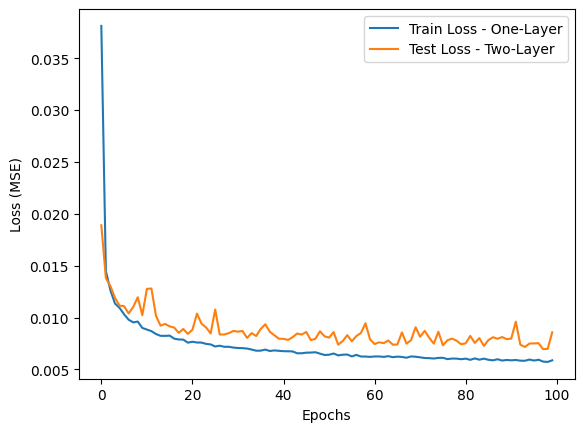

In [5]:
# Plot A and B on the same figure
plt.plot(train_loss, label = 'Train Loss - One-Layer')
plt.plot(test_loss, label='Test Loss - Two-Layer')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


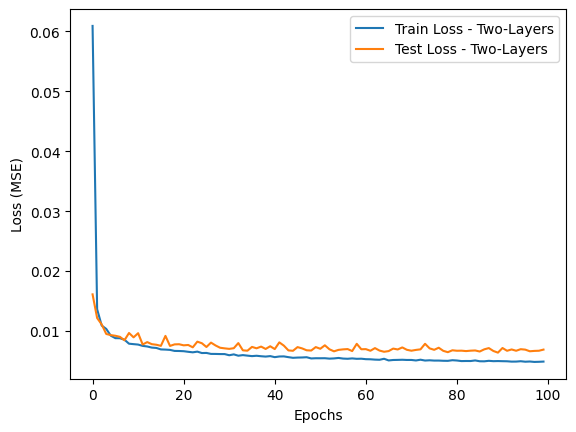

In [6]:
# Plot A and B on the same figure
plt.plot(train_loss2, label = 'Train Loss - Two-Layers')
plt.plot(test_loss2, label='Test Loss - Two-Layers')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


In [5]:
for (inp, out) in train_loader:
    src_mask = torch.any(inp != torch.tensor([0, 0], dtype=inp.dtype, device=inp.device), dim=-1)
    print(src_mask)
    print(src_mask.shape)
    break

tensor([[ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False]])
torch.Size([32, 1024])
